In [2]:
from IPython.core.display import display, HTML
import numpy as np
import pandas as pd
from scipy.special import binom, comb, factorial
import matplotlib.pyplot as plt
from combinations import *
from sys import getsizeof
import pickle
from tqdm import trange

from matplotlib import rc, rcParams
rc('text', usetex=True)
rc('text.latex',preamble=r'\usepackage[utf8]{inputenc}')
rc('text.latex',preamble=r'\usepackage[russian]{babel}')


rcParams['axes.linewidth'] = 2

font = {'family' : 'monospace',
        'size'   : 20,
        'weight' : 'heavy'
       }

rc('font', **font)

is_sorted = lambda a: np.all(a[:-1] <= a[1:])

$
\newcommand{\bolda}{\boldsymbol{a}}
\newcommand{\boldb}{\boldsymbol{b}}
\newcommand{\bolde}{\boldsymbol{e}}
\newcommand{\boldd}{\boldsymbol{d}}
\newcommand{\boldf}{\boldsymbol{f}}
\newcommand{\boldg}{\boldsymbol{g}}
\newcommand{\boldh}{\boldsymbol{h}}
\newcommand{\boldm}{\boldsymbol{m}}
\newcommand{\boldk}{\boldsymbol{k}}
\newcommand{\bolds}{\boldsymbol{s}}
\newcommand{\boldt}{\boldsymbol{t}}
\newcommand{\boldp}{\boldsymbol{p}}
\newcommand{\boldw}{\boldsymbol{w}}
\newcommand{\boldx}{\boldsymbol{x}}
\newcommand{\boldy}{\boldsymbol{y}}
\newcommand{\boldu}{\boldsymbol{u}}
\newcommand{\boldv}{\boldsymbol{v}}
\newcommand{\boldz}{\boldsymbol{z}}
\newcommand{\boldA}{\boldsymbol{A}}
\newcommand{\boldB}{\boldsymbol{B}}
\newcommand{\boldC}{\boldsymbol{C}}
\newcommand{\boldD}{\boldsymbol{D}}
\newcommand{\boldE}{\boldsymbol{E}}
\newcommand{\boldF}{\boldsymbol{F}}
\newcommand{\boldH}{\boldsymbol{H}}
\newcommand{\boldJ}{\boldsymbol{J}}
\newcommand{\boldK}{\boldsymbol{K}}
\newcommand{\boldM}{\boldsymbol{M}}
\newcommand{\boldI}{\boldsymbol{I}}
\newcommand{\boldP}{\boldsymbol{P}}
\newcommand{\boldR}{\boldsymbol{R}}
\newcommand{\boldS}{\boldsymbol{S}}
\newcommand{\boldT}{\boldsymbol{T}}
\newcommand{\boldO}{\boldsymbol{O}}
\newcommand{\boldU}{\boldsymbol{U}}
\newcommand{\boldV}{\boldsymbol{V}}
\newcommand{\boldW}{\boldsymbol{W}}
\newcommand{\boldX}{\boldsymbol{X}}
\newcommand{\boldY}{\boldsymbol{Y}}
\newcommand{\boldZ}{\boldsymbol{Z}}$

### Здесь проводились некоторые расчёты и заготовки для статьи "Комбинаторика розыгрыша в преферансе"

Пусть колода из $n$ карт раздаётся на $k$ рук размера $n_1, \ldots, n_k$. Тогда общее число раскладов равно 
$$
\frac{n!}{n_1!\cdot \ldots \cdot n_k!}.
$$

Для преферанса $n=32$, $k=4$, $n_1=n_2=n_3 = 10$, $n_4=2$, что даёт
$$
\frac{32!}{(10!)^3\cdot 2} \approx 2.75 \cdot 10^{15}.
$$

In [3]:
pref_deal_count = factorial(32, exact=True) // factorial(10, exact=True) ** 3 // 2
print(pref_deal_count, "{:e}".format(pref_deal_count))

2753294408504640 2.753294e+15


In [4]:
bridge_deal_count = factorial(52, exact=True) // factorial(13, exact=True) ** 4
print(bridge_deal_count, "{:e}".format(bridge_deal_count))

53644737765488792839237440000 5.364474e+28


In [5]:
factorial(39, exact=True) // factorial(13, exact=True) ** 3

84478098072866400

In [6]:
comb(32, 10, exact=True), comb(20, 10, exact=True)

(64512240, 184756)

Табличка с количеством раскладов в бридже, в формате латеха:

In [79]:
def print_big_number(n):
    n_str = str(n)
    if len(n_str) < 7:
        return n_str
    result = [n_str[-3:]]
    for i in range(1, int(len(n_str) // 3 + 1)):
        if n_str[-3*i-3: -3*i]:
            result.append(n_str[-3*i-3:-3*i])
    return "\\,".join(result[::-1])

no_trump_total, trump_total = 0, 0
no_trump_distr, trump_distr = 0, 0
for hand_size in range(1, 14):
    no_trump, trump = 0, 0
    for bridge_suit_distr in generate_suit_size_distributions(4*[hand_size], max_suit_size=13):
        no_trump += 1
    for bridge_suit_distr in generate_suit_size_distributions(4*[hand_size], max_suit_size=13, trump_idx=0):
        trump += 1
    no_trump_distr += no_trump
    trump_distr += trump
    coef = factorial(4*hand_size, exact=True) // factorial(hand_size, exact=True) ** 4
    no_trump_total += coef * no_trump
    trump_total += coef * trump
    line = str(hand_size) + ' & ' + str(no_trump) + ' & ' + str(trump) + ' & '
    line += print_big_number(coef * no_trump_total) + ' & '
    line += print_big_number(coef * trump_total)
    print(line +r"\\ \hline")

print(no_trump_distr, trump_distr, print_big_number(no_trump_total), print_big_number(trump_total))

1 & 5 & 7 & 2880 & 4032\\ \hline
2 & 15 & 31 & 95\,558\,400 & 197\,285\,760\\ \hline
3 & 34 & 83 & 4\,658\,556\,672\,000 & 11\,367\,080\,524\,800\\ \hline
4 & 60 & 167 & 239\,411\,384\,372\,160\,000 & 666\,088\,816\,937\,544\,000\\ \hline
5 & 85 & 257 & 11\,745\,413\,002\,086\,396\,272\,640 & 35\,501\,852\,082\,350\,163\,654\,144\\ \hline
6 & 102 & 322 & 546\,001\,480\,975\,931\,651\,306\,668\,032 & 1\,723\,341\,453\,946\,311\,580\,869\,616\,128\\ \hline
7 & 102 & 331 & 22\,885\,653\,297\,369\,770\,795\,281\,976\,524\,800 & 74\,256\,265\,087\,316\,824\,275\,662\,134\,579\,200\\ \hline
8 & 85 & 277 & 847\,377\,024\,710\,223\,186\,014\,764\,142\,594\,952\,000 & 2\,761\,383\,910\,091\,265\,198\,912\,464\,521\,237\,008\,000\\ \hline
9 & 60 & 190 & 27\,795\,821\,870\,226\,538\,553\,685\,071\,211\,799\,439\,040\,000 & 88\,036\,914\,530\,018\,849\,069\,190\,250\,808\,813\,900\,160\,000\\ \hline
10 & 34 & 102 & 758\,870\,935\,904\,755\,745\,803\,731\,021\,598\,700\,956\,983\,191\,040 & 2\,277\

In [73]:
print_big_number(1504049877685950049493)

'1\\,504\\,049\\,877\\,685\\,950\\,049\\,493'

При переборе раскладов полезно учитывать распределение карт по мастям. Пусть в колоде имеется $m$ мастей (обычно $m=4$). Обозначим через $d_{ij}$ количество карт $i$-й масти на $j$-й руке. Получается *факторная матрица*

$$
\boldD = \begin{pmatrix}
d_{11}& d_{12}& \ldots& d_{1k} \\
d_{21}& d_{22}&\ldots &d_{2k} \\
\vdots& \vdots& \ddots& \vdots\\
d_{m1}& d_{m2}&\ldots& d_{mk}
\end{pmatrix},\quad
\sum\limits_{i=1}^m d_{ij} = n_j, \quad 
\sum\limits_{j=1}^k d_{ij} = s_i, \quad 
0\leqslant d_{ij} \leqslant \min\{s_i, n_j\},
$$
где $s_i$ — размер $i$-й масти. Для любого расклада выполняется равенство $\sum\limits_{j=1}^k n_j = \sum\limits_{i=1}^m s_i = n$. Пусть $\boldd_i = (d_{i1}, d_{i2}, \ldots, d_{ik})$ — распределение $i$-й масти по рукам, и число таких распределений $|\boldd_i| = \binom {s_i}{d_{i1},\ldots, d_{ik}} = \frac{s_i!}{d_{i1}!\cdot d_{i2}! \cdot \ldots \cdot d_{ik}!}$. При фиксированной матрице $\boldD$ общее число раскладов равно
$$
\prod\limits_{i=1}^m |\boldd_i| = \frac{s_1! \cdot \ldots\cdot s_m!}{\prod\limits_{i=1}^m\prod\limits_{j=1}^k d_{ij}!}
$$

Тогда общее число раскладов равно 
$$
\sum\limits_{\boldD} \prod\limits_{i=1}^m |\boldd_i| = 
\sum\limits_{\boldD}\frac{s_1! \cdot \ldots\cdot s_m!}{\prod\limits_{i=1}^m\prod\limits_{j=1}^k d_{ij}!},
$$
где суммирование ведётся по всем факторным матрицам $\boldD$, удовлетворяющих приведённым выше ограничением. Перебор всех таких факторных матриц представляет собой NP-трудную задачу.

In [2]:
def contingency_table_variants(r, c, verbose=False):
    total = 0
    total_distr = 0
    distr_map = {}
    r_arr = np.array(r)
    non_zero_indices = r_arr > 0
    fact_prod = factorial(r_arr[non_zero_indices]).prod()
    for d in contingency_table(list(r_arr[non_zero_indices]), c):
        total += 1
        variants = fact_prod / factorial(d).prod()
        key = np.zeros((len(r), len(c)), dtype=np.int32)
        key[non_zero_indices,:] = d
        distr_map[tuple(key.ravel())] = int(variants)
        total_distr += variants
    if verbose:
        print("Total distributions:", total)
        print("Total variants: {:e}".format(total_distr))
    return distr_map

def test_deal_enumeration(suit_sizes, hand_sizes, trump, reduce_perms=True):
    deal_variants = enumerate_deals(suit_sizes, hand_sizes, trump, reduce_perms)
    print("Total distributions:", len(deal_variants))
    total = 0
    total_reduced = 0
    for k, v in deal_variants.items():
        total += v[0]
        total_reduced += v[1]
    print("Total variants: {:e}".format(total))
    print("Total reduced variants: {:e}".format(total_reduced))

Переберём все возможные преферансные сдачи с помощью факторных матриц:

In [3]:
%%time
r = [8, 8, 8, 8]
c = [10, 10, 10, 2]
pref_distr = contingency_table_variants(r, c, verbose=True)

Total distributions: 248358
Total variants: 2.753294e+15
CPU times: user 8.85 s, sys: 94.5 ms, total: 8.94 s
Wall time: 8.94 s


Общее число раскладов совпадает с вычисленным ранее, и это вселяет веру в то, что перебор осуществлён верно.

In [4]:
%%time
test_deal_enumeration(r, c, False)

Total distributions: 10701
Total variants: 1.285111e+14
Total reduced variants: 1.147402e+14
CPU times: user 8.76 s, sys: 1.26 ms, total: 8.76 s
Wall time: 8.76 s


Удаление симметричных раскладов позволяет в несколько раз сократить общее число вариантов:

In [6]:
%%time
test_deal_enumeration(r, c, False, False)

Total distributions: 248358
Total variants: 2.753294e+15
Total reduced variants: 2.753294e+15
CPU times: user 9.68 s, sys: 92.7 ms, total: 9.77 s
Wall time: 9.76 s


In [7]:
%%time
test_deal_enumeration(r, c, True)

Total distributions: 42084
Total variants: 4.844826e+14
Total reduced variants: 4.589215e+14
CPU times: user 15.1 s, sys: 40.3 ms, total: 15.2 s
Wall time: 15.2 s


In [8]:
%%time
test_deal_enumeration(r, c, True, False)

Total distributions: 248358
Total variants: 2.753294e+15
Total reduced variants: 2.753294e+15
CPU times: user 9.64 s, sys: 170 ms, total: 9.81 s
Wall time: 9.74 s


Два квадриллиона и $753$ триллиона с копейками раскладов складываются из $248358$ различных распределений размеров мастей — столько получилось факторных матриц. В среднем получается по 11 миллиардов раскладов на распределение:

In [7]:
print("{:e}".format(pref_deal_count / len(pref_distr)))

1.108599e+10


Максимальное число раскладов для одного распределения — почти триллион:

In [8]:
print("{:e}".format(np.max(list(pref_distr.values()))))

8.851046e+11


Для кодирования сдачи теоретически хватит $58$ бит: $18$ бит для распределения мастей, $40$ бит — для самого расклада.

In [9]:
print("{:e}".format(2 ** 40), "{:e}".format(2 ** 18))

1.099512e+12 2.621440e+05


В преферансе в момент розыгрыша новой взятки всегда $3$ руки одинакового размера $l$ и $4$ масти, поэтому факторная матрица имеет размер $4 \times 3$:
$$
    \boldD = \begin{pmatrix}
d_{11}& d_{12}& d_{13} \\
d_{21}& d_{22}& d_{23} \\
d_{31}& d_{32}& d_{33} \\
d_{41}& d_{42}& d_{43}
\end{pmatrix},
\quad d_{i1} + d_{i2} + d_{i3} = s_i, \; 1 \leqslant i \leqslant 4,
\quad d_{1j} + d_{2j} + d_{3j} + d_{4j} = l, \; 1 \leqslant j \leqslant 3,
\quad s_1 + s_2 + s_3 + s_4 = 3l.
$$

In [10]:
%%time
r = [8, 8, 8, 6]
c = [10, 10, 10]
pref_distr_no_widow = contingency_table_variants(r, c, verbose=True)

Total distributions: 24303
Total variants: 5.550997e+12
CPU times: user 911 ms, sys: 20.4 ms, total: 931 ms
Wall time: 920 ms


In [11]:
%%time
test_deal_enumeration(r, c, False)

Total distributions: 4206
Total variants: 1.062468e+12
Total reduced variants: 9.254358e+11
CPU times: user 1.62 s, sys: 8.12 ms, total: 1.63 s
Wall time: 1.63 s


In [14]:
%%time
test_deal_enumeration(r, c, True)

Total distributions: 12306
Total variants: 2.907532e+12
Total reduced variants: 2.775768e+12
CPU times: user 3.32 s, sys: 12 ms, total: 3.33 s
Wall time: 3.33 s


In [15]:
%%time
r = [8, 8, 7, 7]
c = [10, 10, 10]
pref_distr_no_widow = contingency_table_variants(r, c, verbose=True)

Total distributions: 25191
Total variants: 5.550997e+12
CPU times: user 907 ms, sys: 12.2 ms, total: 919 ms
Wall time: 912 ms


In [16]:
%%time
test_deal_enumeration(r, c, False)

Total distributions: 6495
Total variants: 1.543156e+12
Total reduced variants: 1.388307e+12
CPU times: user 2.15 s, sys: 15.9 ms, total: 2.16 s
Wall time: 2.15 s


In [17]:
%%time
test_deal_enumeration(r, c, True)

Total distributions: 12819
Total variants: 2.925633e+12
Total reduced variants: 2.776345e+12
CPU times: user 3.49 s, sys: 4 ms, total: 3.5 s
Wall time: 3.49 s


Можно уменьшить число перебираемых раскладов за счёт удаления симметрий. Ограничим перебор матрицами $\boldD$ со следующими свойствами:

* $s_1 \leqslant s_2 \leqslant \ldots \leqslant s_m$ (масти отсортированы по возрастанию);

* если $s_i = s_{i+1}$, то $\boldd_i \preccurlyeq \boldd_{i+1}$ (в лексикографическом смысле);

* если $\boldd_i = \boldd_{i+1} = \ldots = \boldd_{i+p-1}$, то масти $i, i + 1, \ldots, i+p-1$ можно переставлять между собой; выберем одну такую перестановку, что набор карт масти $j$ лексикографически меньше набора карт масти $j+1$, $i \leqslant j < i + p$. Количество таких перестановок равно 
$$
\left|\left\{(i_1, \ldots, i_p)\colon 1 \leqslant i_1 \leqslant i_2 \leqslant\ldots \leqslant i_p \leqslant |\boldd_i|\right\}\right| = \binom{|\boldd_i| + p - 1}{p}
$$
При $p=1$ одинаковых мастей нет, и эта формула даёт тот же результат, что и ранее:
$$
\binom{|\boldd_i| + 1 - 1}{1} = |\boldd_i| = \binom {s_i}{d_{i1},\ldots, d_{ik}} = \frac{s_i!}{d_{i1}!\cdot d_{i2}! \cdot \ldots \cdot d_{ik}!}
$$

In [83]:
def get_deal_counts(card_distributions, verbose=0):
    result = []
    result_reduced = []
    if verbose > 0:
        print("Total suit sizes distributions:", len(card_distributions))
    for suit_sizes, contingency_table_map in card_distributions.items():
        if verbose > 0:
            print(f"suit_sizes = {suit_sizes}, size of contingency table map = {len(contingency_table_map)}")
        for contingency_table, count in contingency_table_map.items():
            if verbose > 2:
                print(np.array(contingency_table).reshape(4, -1))
            if verbose > 1:
                print("Number of card distributions:", count)
            result.append(count[0])
            result_reduced.append(count[1])
    return np.array(result), np.array(result_reduced)

In [88]:
trump_cnts = dict()
notrump_cnts = dict()
trump_cnts_reduced = dict()
notrump_cnts_reduced = dict()

def deal_counts_summary(hand_size, n_hands=3, max_suit_size=8):
    deals = get_card_distributions(hand_size, n_hands, max_suit_size, trump=False)
    deal_counts, deal_counts_reduced = get_deal_counts(deals, 0)
    notrump_cnts[hand_size] = deal_counts
    notrump_cnts_reduced[hand_size] = deal_counts_reduced
    print("Deal no trump variants:", deal_counts.sum())
    print("Deal no trump variants reduced:", deal_counts_reduced.sum())
    
    deals_trump = get_card_distributions(hand_size, n_hands, max_suit_size, trump=True)
    deal_trump_counts, deal_trump_counts_reduced = get_deal_counts(deals_trump, 0)
    trump_cnts[hand_size] = deal_trump_counts
    trump_cnts_reduced[hand_size] = deal_trump_counts_reduced
    print("Deal trump variants:", deal_trump_counts.sum())
    print("Deal trump variants reduced:", deal_trump_counts_reduced.sum())
    dc_df = pd.DataFrame({'deal_cnt': deal_counts, 'deal_cnt_reduced': deal_counts_reduced})
    dc_df_trump = pd.DataFrame({'deal_trump_cnt': deal_trump_counts, 
                                'deal_trump_cnt_reduced': deal_trump_counts_reduced})
    return pd.concat([dc_df.describe().astype(int), dc_df_trump.describe().astype(int)], axis=1)

In [96]:
%%time
deal_counts_summary(13, 4, 13)

Deal no trump variants: 0.0
Deal no trump variants reduced: 0.0
Deal trump variants: 0.0
Deal trump variants reduced: 0.0


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [92]:
no_tr_cnts_b = [73, 25089, 6467816, 1336331889]
tr_cnts_b = [136, 62832, 20689216, 4757949072]

In [47]:
no_tr_cnts = [13, 555, 19996, 631959, 16350012, 341718684, 5611979988, 68565702195, 567603793650, 2605624201677]
tr_cnts = [21, 1188, 55062, 1974972, 56321424, 1251390792, 21311636496, 265235061420, 2198253354300, 9803165865276]

In [48]:
sum(no_tr_cnts), sum(tr_cnts)

(3247764398729, 12289275660951)

In [49]:
old = 12620951697900 + 26257732924194
(old - sum(no_tr_cnts) - sum(tr_cnts)) / old

0.6003712519931653

In [87]:
trump_cnts

{1: array([6, 2, 2, 2, 1, 1, 1, 2, 2, 2]),
 5: array([ 224,   56,  336, ...,  840, 2100,  840])}

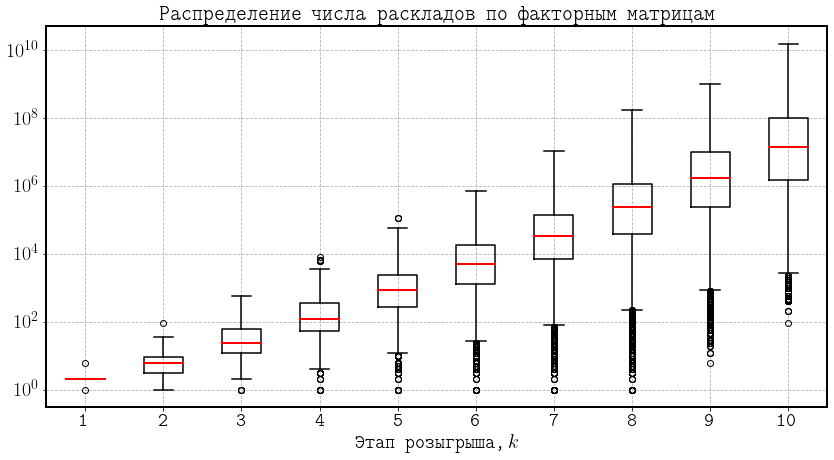

In [153]:
plt.figure(figsize=(14, 7))
plt.boxplot([np.log10(notrump_cnts[i]) for i in range(1, 11)],
            whiskerprops=dict(linestyle='-',linewidth=1.5, color='black'),
            boxprops={'linewidth': 1.5},
            capprops={'linewidth':1.5},
            medianprops={'linewidth':2, 'color': 'red'},
);
plt.yticks(np.arange(0, 11, 2), labels=[r"$10^0$", r"$10^2$", r"$10^4$", r"$10^6$", r"$10^8$", r"$10^{10}$"]);
plt.xlabel("Этап розыгрыша," + r"\,$k$")
plt.grid(ls='--')
plt.title("Распределение числа раскладов по факторным матрицам");

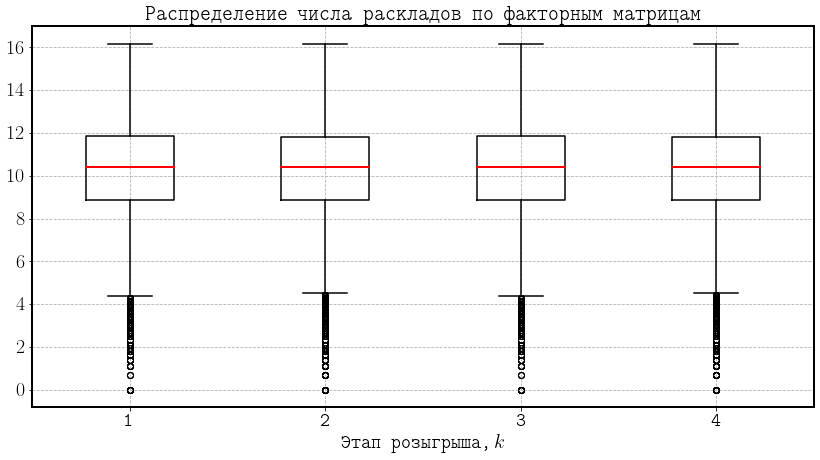

In [175]:
i = 7
plt.figure(figsize=(14, 7))
plt.boxplot([np.log(notrump_cnts[i]), np.log(trump_cnts[i]), np.log(notrump_cnts[i]), np.log(trump_cnts_reduced[i])],
            whiskerprops=dict(linestyle='-',linewidth=1.5, color='black'),
            boxprops={'linewidth': 1.5},
            capprops={'linewidth':1.5},
            medianprops={'linewidth':2, 'color': 'red'},
);
#plt.yticks(np.arange(0, 11, 2), labels=[r"$10^0$", r"$10^2$", r"$10^4$", r"$10^6$", r"$10^8$", r"$10^{10}$"]);
plt.xlabel("Этап розыгрыша," + r"\,$k$")
plt.grid(ls='--')
plt.title("Распределение числа раскладов по факторным матрицам");

In [73]:
n = 1
print(notrump_cnts_reduced[n].sum(), trump_cnts_reduced[n].sum())
print("{:.2%}, {:.2%}".format(1 - notrump_cnts_reduced[n].sum() / notrump_cnts[n].sum(),
                              1 - trump_cnts_reduced[n].sum() / trump_cnts[n].sum()))

13 21
0.00%, 0.00%


In [77]:
s = 0
for k, v in trump_cnts_reduced.items():
    s += v.sum()
print(s)

11661580470951


In [80]:
best = s + 2916531082456
best

14578111553407

In [81]:
(old - best) / old

0.6250358854701956

In [78]:
1 - s / sum(tr_cnts)

0.051076662882133306

In [10]:
%%time
hand_size = 7
trump = False
deals = get_card_distributions(hand_size, trump=trump)
deal_counts, deal_counts_reduced = card_distributions_summary(deals, 0)

CPU times: user 8.38 s, sys: 15.8 ms, total: 8.4 s
Wall time: 8.38 s


In [11]:
print("Contingency tables:", len(deal_counts))
print("Deal variants:", deal_counts.sum())
print("Max variants per table:", deal_counts.max())
print("Deal variants reduced:", deal_counts_reduced.sum())
print("Max reduced variants per table:", deal_counts_reduced.max())

Contingency tables: 33053
Deal variants: 5611979988
Max variants per table: 10584000
Deal variants reduced: 5399087904
Max reduced variants per table: 10584000


In [14]:
import pandas as pd
dc_df = pd.DataFrame({'deal_cnt': deal_counts, 'deal_cnt_reduced': deal_counts_reduced})
dc_df.describe().astype(int)

,deal_cnt,deal_cnt_reduced
count,33053,33053
mean,169787,163346
std,432028,411801
min,1,1
25%,7056,7056
50%,33600,33600
75%,141120,132300
max,10584000,10584000


In [14]:
def build_contingency_tables_indexer(hand_size, trump, reduce_level=2):
    deals = get_card_distributions(hand_size, trump=trump, reduce_level=reduce_level)
    table_array = np.array([], dtype=np.int8)
    table2index = {}
    for suit_sizes, contngency_table_map in deals.items():
        for contingency_table, count in contngency_table_map.items():
            table = np.array(contingency_table, dtype=np.int8).reshape(4, -1)
            if table_array.size == 0:
                table_array = np.array(table)[np.newaxis, ...]
            else:
                table_array = np.append(table_array, table[np.newaxis, ...], axis=0)
            table2index[contingency_table] = table_array.shape[0] - 1
    return table_array, table2index

In [60]:
def get_table_index(hand_size, trump, reduce_level, verbose=False):
    if verbose:
        print(f"Hand size = {hand_size}")
    tables, table2index = build_contingency_tables_indexer(hand_size, trump, reduce_level=reduce_level)
    if verbose:
        print(f"  Shape of table array = {tables.shape}")
        print("  Size of tables:", getsizeof(tables))
        print(f"  Len of table2index map = {len(table2index)}")
        print("  Size of table2index:", getsizeof(table2index))
    return tables, table2index

In [65]:
tables, _ = get_table_index(2, False, 2, verbose=True)

Hand size = 2
  Shape of table array = (59, 4, 3)
  Size of tables: 844
  Len of table2index map = 59
  Size of table2index: 2272


In [120]:
tables.shape

(59, 4, 3)

In [102]:
def save_table_index(hand_size, trump, reduce=True):
    tables, table2index = build_contingency_tables_indexer(hand_size, trump, reduce=reduce)
    np.save("./tables/index2table_" + str(hand_size) + ("_trump" if trump else ""), tables)
    with open("./tables/table2index_" + str(hand_size) + ("_trump" if trump else "") + ".pickle", "wb") as f:
        pickle.dump(table2index, f, protocol=pickle.HIGHEST_PROTOCOL)

In [103]:
for hand_size in trange(1, 11):
    save_table_index(hand_size, False)
    save_table_index(hand_size, True)

100%|███████████████████████████████████████████| 10/10 [03:23<00:00, 20.34s/it]


In [90]:
tables, table2index = get_table_index(8, True, verbose=True)

Hand size = 8
  Shape of table array = (164893, 4, 3)
  Size of tables: 1978852
  Len of table2index map = 164893
  Size of table2index: 5242968


In [24]:
table = np.load('./tables/index2table_7.npy')
table.shape

(33053, 4, 3)

In [25]:
table[123]

array([[1, 3, 1],
       [2, 0, 3],
       [3, 2, 0],
       [1, 2, 3]], dtype=int8)

In [113]:
table[550] <= table[551]

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True, False,  True],
       [False,  True, False]])

In [4]:
def print_distributions_summary(trump):
    print(f"Перечисление {'бес' if not trump else ''}козырных вариантов...")
    total_suit_sizes=0
    total_variants = 0
    total_variants_reduced = 0
    total_suit_distributions = 0
    total_suit_distributions_reduced = 0
    for hand_size in range(1, 11):
        print("hand_size = {}:".format(hand_size))
        deals = get_card_distributions(hand_size, trump=trump, reduce_perms=False)
        print("  Число вариантов распределения размеров мастей:", len(deals))
        suit_distrs, variants = card_distributions_summary(deals)
        print("  Число факторных матриц:", suit_distrs)
        reduced_deals = get_card_distributions(hand_size, trump=trump, reduce_perms=True)
        suit_distrs_reduced, variants_reduced = card_distributions_summary(reduced_deals)
        print("  Число факторных матриц после удаления симметрий:", suit_distrs_reduced)
        if variants > 1e6:
            print("  Число раскладов: {:e}".format(variants))
        else:
            print("  Число раскладов:", variants)
        total_suit_distributions += suit_distrs
        total_variants += variants
        total_suit_sizes += len(deals)
        
        if variants > 1e6:
            print("  Число раскладов после удаления симметрий: {:e}".format(variants_reduced))
        else:
            print("  Число раскладов после удаления симметрий:", variants_reduced)
        total_suit_distributions_reduced += suit_distrs_reduced
        total_variants_reduced += variants_reduced
        print("  Среднее число раскладов на одну матрицу: {:.2f}".format(variants / suit_distrs))
        print("  Среднее число раскладов на одну матрицу после удаления симметрий: {:.2f}".format(
            variants_reduced / suit_distrs_reduced
        ))
        print("  Экономия: {:.4%}".format(1 - total_variants_reduced / total_variants))
        
    print("\nОбщее число раскладов: {:e}".format(total_variants))
    print("Общее число вариантов распределения размеров мастей:", total_suit_sizes)
    print("Общее число факторных матриц:", total_suit_distributions)
    print("Среднее число раскладов на одну матрицу:", total_variants / total_suit_distributions)

    print("\nОбщее число раскладов после удаления симметрий: {:e}".format(total_variants_reduced))
    print("Общее число факторных матриц после удаления симметрий:", total_suit_distributions_reduced)
    print("Общая экономия: {:.4%}".format(1. - total_variants_reduced / total_variants))
    print("Среднее число раскладов на одну матрицу после удаления симметрий: {:.2f}".format(
        total_variants_reduced / total_suit_distributions_reduced
    ))

In [14]:
%%time
print_distributions_summary(False)

Перечисление бескозырных вариантов...
hand_size = 1:
  Число вариантов распределения размеров мастей: 3
  Число факторных матриц: 10
  Число факторных матриц после удаления симметрий: 5
  Число раскладов: 18
  Число раскладов после удаления симметрий: 13
  Среднее число раскладов на одну матрицу: 1.80
  Среднее число раскладов на одну матрицу после удаления симметрий: 2.60
  Экономия: 27.7778%
hand_size = 2:
  Число вариантов распределения размеров мастей: 9
  Число факторных матриц: 119
  Число факторных матриц после удаления симметрий: 59
  Число раскладов: 810
  Число раскладов после удаления симметрий: 534
  Среднее число раскладов на одну матрицу: 6.81
  Среднее число раскладов на одну матрицу после удаления симметрий: 9.05
  Экономия: 33.9372%
hand_size = 3:
  Число вариантов распределения размеров мастей: 17
  Число факторных матриц: 719
  Число факторных матриц после удаления симметрий: 389
  Число раскладов: 28560
  Число раскладов после удаления симметрий: 19560
  Среднее чис

In [15]:
%%time
print_distributions_summary(True)

Перечисление козырных вариантов...
hand_size = 1:
  Число вариантов распределения размеров мастей: 4
  Число факторных матриц: 13
  Число факторных матриц после удаления симметрий: 10
  Число раскладов: 24
  Число раскладов после удаления симметрий: 21
  Среднее число раскладов на одну матрицу: 1.85
  Среднее число раскладов на одну матрицу после удаления симметрий: 2.10
  Экономия: 12.5000%
hand_size = 2:
  Число вариантов распределения размеров мастей: 16
  Число факторных матриц: 224
  Число факторных матриц после удаления симметрий: 159
  Число раскладов: 1440
  Число раскладов после удаления симметрий: 1182
  Среднее число раскладов на одну матрицу: 6.43
  Среднее число раскладов на одну матрицу после удаления симметрий: 7.43
  Экономия: 17.8279%
hand_size = 3:
  Число вариантов распределения размеров мастей: 40
  Число факторных матриц: 1785
  Число факторных матриц после удаления симметрий: 1272
  Число раскладов: 67200
  Число раскладов после удаления симметрий: 54486
  Среднее

In [31]:
def plot_card_distributions(hand_size, trump, reduce=True):
    values = []
    deals = get_card_distributions(hand_size, trump=trump, reduce_perms=reduce)
    for _, table_map in deals.items():
        for table, count in table_map.items():
            values.append(count)
    plt.figure(figsize=(14, 7))
    values = np.array(values)
    print(len(values))
    plt.hist(values, bins=100, log=True, histtype='stepfilled', color='r', edgecolor='b', lw=2)
    eps = values.max() * 0.01
    plt.xlim(-eps, values.max() + eps)

25509


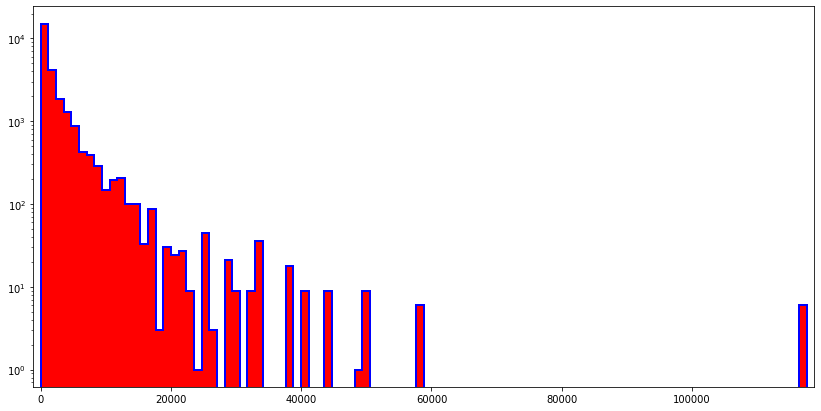

In [32]:
plot_card_distributions(5, True, True)

17825


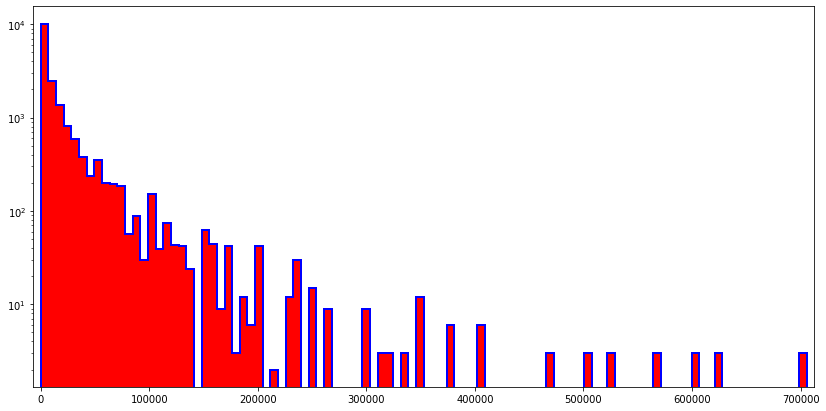

In [5]:
plot_card_distributions(6, False)

129969


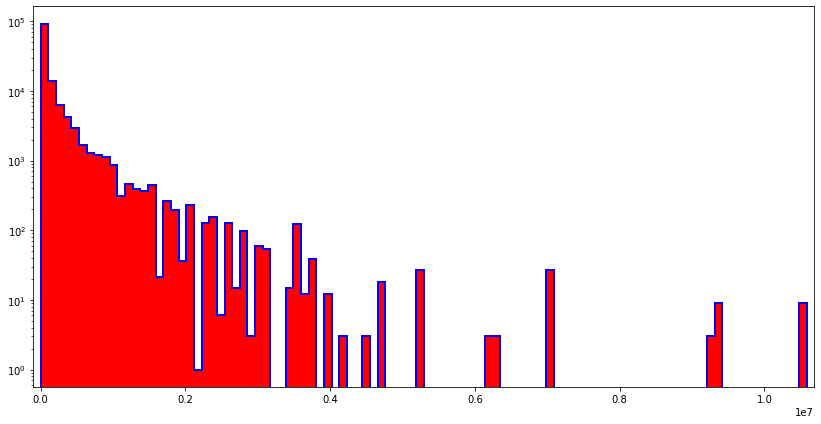

In [6]:
plot_card_distributions(7, True)

31428


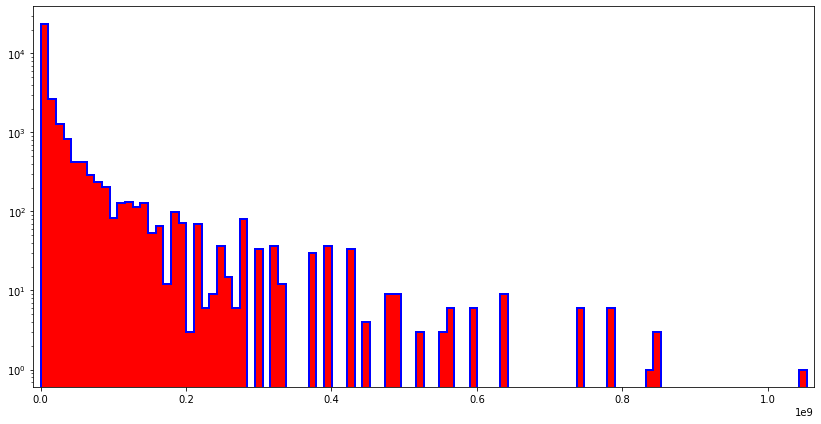

In [35]:
plot_card_distributions(9, False)

124563


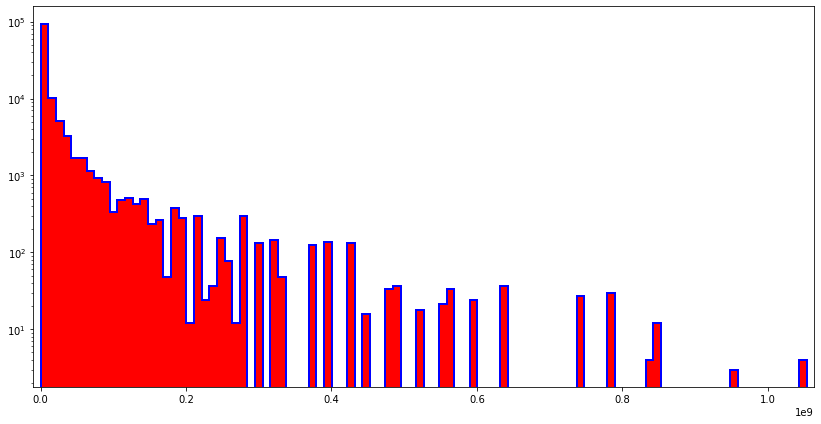

In [36]:
plot_card_distributions(9, True)

10701


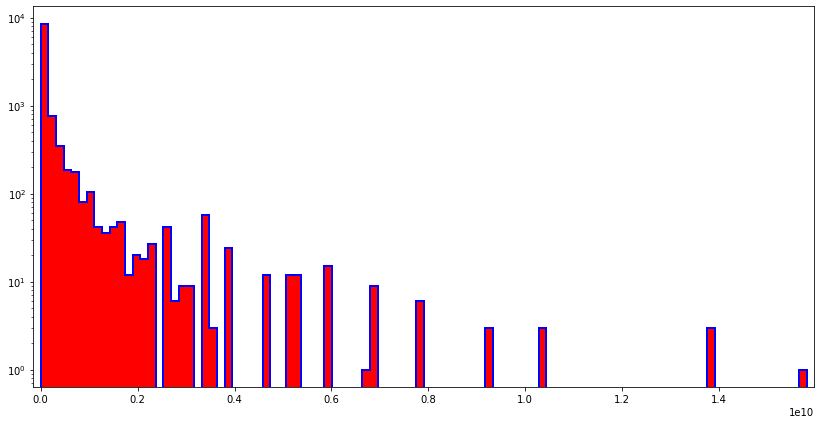

In [33]:
plot_card_distributions(10, False)

42084


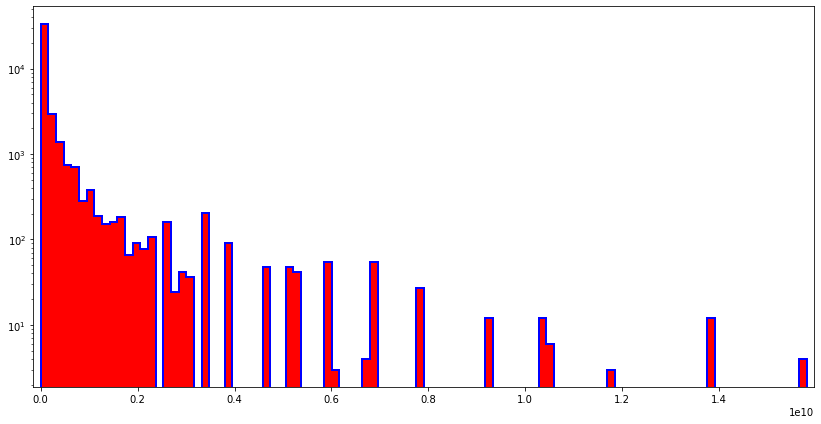

In [34]:
plot_card_distributions(10, True)

In [14]:
trump_total = 0
no_trump_total = 0
for hand_size in range(1, 11):
    print("hand_size =", hand_size)
    for trump in [False, True]:
        print(("  " if trump else "  no ") + "trump")
        for suit_sizes in generate_suit_size_distributions(3*[hand_size], trump_idx=0 if trump else None):
            print(f"    {suit_sizes}")
            if trump:
                trump_total += 1
            else:
                no_trump_total += 1
print(trump_total, no_trump_total)

hand_size = 1
  no trump
    [0 1 1 1]
    [0 0 1 2]
    [0 0 0 3]
  trump
    [3 0 0 0]
    [2 0 0 1]
    [1 0 1 1]
    [1 0 0 2]
hand_size = 2
  no trump
    [1 1 2 2]
    [0 2 2 2]
    [1 1 1 3]
    [0 1 2 3]
    [0 0 3 3]
    [0 1 1 4]
    [0 0 2 4]
    [0 0 1 5]
    [0 0 0 6]
  trump
    [6 0 0 0]
    [5 0 0 1]
    [4 0 1 1]
    [3 1 1 1]
    [4 0 0 2]
    [3 0 1 2]
    [2 1 1 2]
    [2 0 2 2]
    [1 1 2 2]
    [3 0 0 3]
    [2 0 1 3]
    [1 1 1 3]
    [1 0 2 3]
    [2 0 0 4]
    [1 0 1 4]
    [1 0 0 5]
hand_size = 3
  no trump
    [2 2 2 3]
    [1 2 3 3]
    [0 3 3 3]
    [1 2 2 4]
    [1 1 3 4]
    [0 2 3 4]
    [0 1 4 4]
    [1 1 2 5]
    [0 2 2 5]
    [0 1 3 5]
    [0 0 4 5]
    [1 1 1 6]
    [0 1 2 6]
    [0 0 3 6]
    [0 1 1 7]
    [0 0 2 7]
    [0 0 1 8]
  trump
    [8 0 0 1]
    [7 0 1 1]
    [6 1 1 1]
    [7 0 0 2]
    [6 0 1 2]
    [5 1 1 2]
    [5 0 2 2]
    [4 1 2 2]
    [3 2 2 2]
    [6 0 0 3]
    [5 0 1 3]
    [4 1 1 3]
    [4 0 2 3]
    [3 1 2 3]
    [2 2 2 3]
    [

In [7]:
from tqdm import tqdm

c = 0
for matrix in tqdm(contingency_table([8, 8, 8, 8], [10, 10, 10, 2])):
    c += 1
print(c)

248358it [00:05, 49106.30it/s]

248358
